In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('movies.dat', sep = '::', header= None)
data1.head()

,0,1,2
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
data1.columns = ['Movie_ID','Movie_Title','Genre']

In [4]:
data1.tail()

,Movie_ID,Movie_Title,Genre
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance
10680,65133,Blackadder Back & Forth (1999),Comedy


In [5]:
data2 = pd.read_csv('ratings.dat',sep = '::', names = ['User_ID','Movie_ID','Rating','Timestamp'])
data2.head()

,User_ID,Movie_ID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [6]:
data1.shape

(10681, 3)

In [7]:
data2.shape

(10000054, 4)

In [8]:
data = pd.merge(data2, data1, on = 'Movie_ID')

In [9]:
data.head(10)

,User_ID,Movie_ID,Rating,Timestamp,Movie_Title,Genre
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,139,122,3.0,974302621,Boomerang (1992),Comedy|Romance
2,149,122,2.5,1112342322,Boomerang (1992),Comedy|Romance
3,182,122,3.0,943458784,Boomerang (1992),Comedy|Romance
4,215,122,4.5,1102493547,Boomerang (1992),Comedy|Romance
5,217,122,3.0,844429650,Boomerang (1992),Comedy|Romance
6,281,122,3.0,844437024,Boomerang (1992),Comedy|Romance
7,326,122,3.0,838997566,Boomerang (1992),Comedy|Romance
8,351,122,1.0,955831012,Boomerang (1992),Comedy|Romance
9,357,122,3.0,945884437,Boomerang (1992),Comedy|Romance


In [10]:
data.shape

(10000054, 6)

In [11]:
data.groupby('Movie_Title').mean()['Rating']

Movie_Title
"Great Performances" Cats (1998)                 3.583333
'Round Midnight (1986)                           3.720000
'Til There Was You (1997)                        2.837748
'burbs, The (1989)                               2.969415
'night Mother (1986)                             3.450237
                                                   ...   
eXistenZ (1999)                                  3.316369
ffolks (a.k.a. North Sea Hijack) (1980)          3.051724
loudQUIETloud: A Film About the Pixies (2006)    3.750000
xXx: State of the Union (2005)                   2.244582
Ã‚ge d'or, L' (1930)                             3.585106
Name: Rating, Length: 10676, dtype: float64

In [12]:
data.groupby('Movie_Title').count()['Rating']

Movie_Title
"Great Performances" Cats (1998)                    6
'Round Midnight (1986)                             50
'Til There Was You (1997)                         302
'burbs, The (1989)                               1504
'night Mother (1986)                              211
                                                 ... 
eXistenZ (1999)                                  2908
ffolks (a.k.a. North Sea Hijack) (1980)            29
loudQUIETloud: A Film About the Pixies (2006)       8
xXx: State of the Union (2005)                    323
Ã‚ge d'or, L' (1930)                               47
Name: Rating, Length: 10676, dtype: int64

In [13]:
a_data = pd.DataFrame(data.groupby('Movie_Title').mean()['Rating'])

In [14]:
a_data

,Rating
Movie_Title,
"""Great Performances"" Cats (1998)",3.583333
'Round Midnight (1986),3.720000
'Til There Was You (1997),2.837748
"'burbs, The (1989)",2.969415
'night Mother (1986),3.450237
...,...
eXistenZ (1999),3.316369
ffolks (a.k.a. North Sea Hijack) (1980),3.051724
loudQUIETloud: A Film About the Pixies (2006),3.750000


In [15]:
a_data['Rating_Count'] = data.groupby('Movie_Title').count()['Rating']

In [16]:
a_data

,Rating,Rating_Count
Movie_Title,,
"""Great Performances"" Cats (1998)",3.583333,6
'Round Midnight (1986),3.720000,50
'Til There Was You (1997),2.837748,302
"'burbs, The (1989)",2.969415,1504
'night Mother (1986),3.450237,211
...,...,...
eXistenZ (1999),3.316369,2908
ffolks (a.k.a. North Sea Hijack) (1980),3.051724,29
loudQUIETloud: A Film About the Pixies (2006),3.750000,8


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

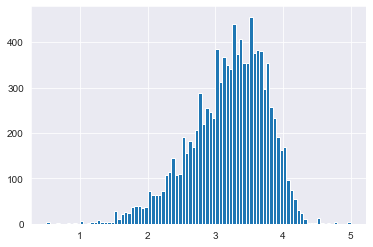

In [18]:
plt.hist(a_data['Rating'], bins = 90)
plt.show()

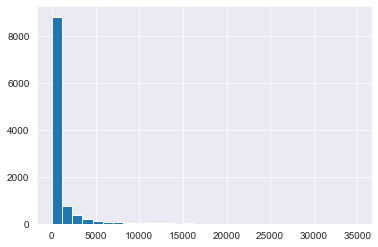

In [19]:
plt.hist(a_data['Rating_Count'], bins = 30)
plt.show()

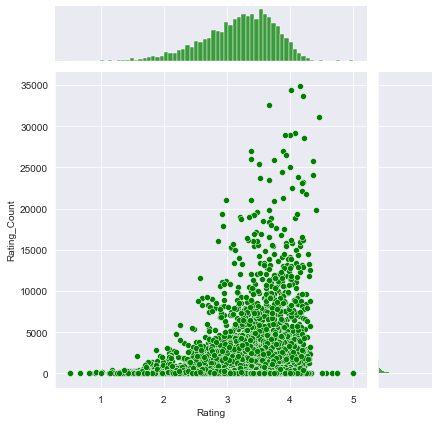

In [20]:
sns.jointplot(x = a_data['Rating'], y = a_data['Rating_Count'], data = a_data, color= 'green', height= 6)

In [21]:
data.head()

,User_ID,Movie_ID,Rating,Timestamp,Movie_Title,Genre
0,1,122,5.0,838985046,Boomerang (1992),Comedy|Romance
1,139,122,3.0,974302621,Boomerang (1992),Comedy|Romance
2,149,122,2.5,1112342322,Boomerang (1992),Comedy|Romance
3,182,122,3.0,943458784,Boomerang (1992),Comedy|Romance
4,215,122,4.5,1102493547,Boomerang (1992),Comedy|Romance


In [22]:
rating_matrix = data.pivot_table(values = 'Rating', index = 'User_ID', columns = 'Movie_Title')

In [23]:
rating_matrix

Movie_Title,"""Great Performances"" Cats (1998)",'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (a.k.a. The California Dolls) (1981),...And God Created Woman (Et Dieu... crÃ©a la femme) (1956),...And God Spoke (1993),...And Justice for All (1979),...,Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),[Rec] (2007),eXistenZ (1999),ffolks (a.k.a. North Sea Hijack) (1980),loudQUIETloud: A Film About the Pixies (2006),xXx: State of the Union (2005),"Ã‚ge d'or, L' (1930)"
User_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
a_data.sort_values('Rating_Count', ascending = False).head(20)

,Rating,Rating_Count
Movie_Title,,
Pulp Fiction (1994),4.157426,34864
Forrest Gump (1994),4.013582,34457
"Silence of the Lambs, The (1991)",4.204200,33668
Jurassic Park (1993),3.661564,32631
"Shawshank Redemption, The (1994)",4.457238,31126
Braveheart (1995),4.082390,29154
"Fugitive, The (1993)",4.006925,28951
Terminator 2: Judgment Day (1991),3.927698,28948
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),4.220209,28566


In [38]:
pulp_fiction_rating = rating_matrix["Pulp Fiction (1994)"]
pulp_fiction_rating.head(10)

User_ID
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    2.0
Name: Pulp Fiction (1994), dtype: float64

In [40]:
pulp_corr = rating_matrix.corrwith(pulp_fiction_rating)

In [48]:
corr_df = pd.DataFrame(pulp_corr,columns = ['Correlation'])

In [50]:
corr_df.head()

,Correlation
Movie_Title,
"""Great Performances"" Cats (1998)",0.917346
'Round Midnight (1986),-0.056328
'Til There Was You (1997),-0.091442
"'burbs, The (1989)",0.032384
'night Mother (1986),-0.005921


In [54]:
corr_df = corr_df.join(a_data['Rating_Count'])

In [55]:
corr_df.head()

,Correlation,Rating_Count
Movie_Title,,
"""Great Performances"" Cats (1998)",0.917346,6
'Round Midnight (1986),-0.056328,50
'Til There Was You (1997),-0.091442,302
"'burbs, The (1989)",0.032384,1504
'night Mother (1986),-0.005921,211


In [60]:
corr_df[corr_df['Rating_Count']>500].sort_values(['Correlation'],ascending = False)

,Correlation,Rating_Count
Movie_Title,,
Pulp Fiction (1994),1.000000,34864
Reservoir Dogs (1992),0.512427,13428
Kill Bill: Vol. 1 (2003),0.425147,8848
Kill Bill: Vol. 2 (2004),0.403495,7555
Trainspotting (1996),0.354460,11791
...,...,...
Jungle2Jungle (a.k.a. Jungle 2 Jungle) (1997),-0.221986,1058
"Kid in King Arthur's Court, A (1995)",-0.226605,1046
Man of the House (1995),-0.235133,732


#### Prediction Function

In [61]:
def predict_movie(movie_name):
    movie_rating = rating_matrix[movie_name]
    movie_corr = rating_matrix.corrwith(movie_rating)
    movie_corr_df = pd.DataFrame(movie_corr,columns = ['Correlation'])
    movie_corr_df = movie_corr_df.join(a_data['Rating_Count'])
    sim_movies = movie_corr_df[movie_corr_df['Rating_Count']>500].sort_values(['Correlation'],ascending = False)
    
    return sim_movies
    
    
    

In [65]:
predict_movie("xXx: State of the Union (2005)")

,Correlation,Rating_Count
Movie_Title,,
For Love or Money (1993),1.0,589
Unstrung Heroes (1995),1.0,874
My Family (1995),1.0,603
"Boys of St. Vincent, The (1992)",1.0,566
"Return of Martin Guerre, The (Retour de Martin Guerre, Le) (1982)",1.0,1053
...,...,...
Paris Is Burning (1990),NaN,644
Passion Fish (1992),NaN,755
Strawberry and Chocolate (Fresa y chocolate) (1993),NaN,624


In [64]:
rating_matrix.columns

Index(['"Great Performances" Cats (1998)', ''Round Midnight (1986)',
       ''Til There Was You (1997)', ''burbs, The (1989)',
       ''night Mother (1986)', '*batteries not included (1987)',
       '...All the Marbles (a.k.a. The California Dolls) (1981)',
       '...And God Created Woman (Et Dieu... crÃ©a la femme) (1956)',
       '...And God Spoke (1993)', '...And Justice for All (1979)',
       ...
       'Zorba the Greek (Alexis Zorbas) (1964)', 'Zorro, the Gay Blade (1981)',
       'Zulu (1964)', 'Zus & Zo (2001)', '[Rec] (2007)', 'eXistenZ (1999)',
       'ffolks (a.k.a. North Sea Hijack) (1980)',
       'loudQUIETloud: A Film About the Pixies (2006)',
       'xXx: State of the Union (2005)', 'Ã‚ge d'or, L' (1930)'],
      dtype='object', name='Movie_Title', length=10676)